# HAKUNA MADATA
sindiana samin <br>
dhia fauziyah salsabila <br>
defina nurzamzam <br>
fransiska situmorang <br>

# Python Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.16.5
pandas version :  0.25.1
seaborn version :  0.11.1


In [2]:
df = pd.read_csv('Train.csv')

In [3]:
#reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
df= reduce_mem_usage(df)

Mem. usage decreased to  0.45 Mb (55.2% reduction)


# 1. Load & Describe Data

In [5]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


_Renaming target into Simpler Name_

In [6]:
df.rename(columns={'Reached.on.Time_Y.N': 'Late'}, inplace=True)

# 2. Exploratory Data Analysis

## 2.1. Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Late                   10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset memiliki 12 columns, dan 10999 baris data.

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Late
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Data menunjukkan bahwa setidaknya tiap customer pernah melakukan sekitar 2 panggilan ke customer care yang berarti setiap customer 
memiliki indikasi bahwa setiap customer pernah mengonfirmasi keberadaan barangnya ,
rata-rata rating yang didapatkan dari customer adalah 3,
rata-rata harga barang yang diantarkan adalah 210, dengan barang paling mahal yang pernah diantarkan adalah 310 dan yang paling murah adalah 96,
setidaknya setiap customer pernah melakukan 2 kali pembelian
Setiap barang yang diantarkan setidaknya mendapat potongan harga sebanyak 1, adapun potongan harga tertinggi yang pernah diberikan adalah 65
rata-rata barang yang diantar seberat 3 kg, sedangkan barang paling berat yang pernah diantar adalah sekitar 8 kg

## 2.2. EDA based on Feature Type

In [9]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
cat = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
num = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Late']

### 2.2.1. EDA for Categorical Feature

In [11]:
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Kebanyakan barang berasal dari warehouse blok F, dengan moda pengiriman paling sering digunakan adalah kapal laut, 
dan pengiriman kebanyakan dilakukan untuk mengantar barang dengan tingkat kepentingan rendah dan sedang

In [12]:
df_block = pd.DataFrame(df.Warehouse_block.value_counts().reset_index().values, columns=["Warehouse_block", "Count"])
df_block = df_block.sort_index(axis = 0, ascending=True)
df_block['Percentage'] = (df_block['Count'] / len(df)) * 100
df_block

,Warehouse_block,Count,Percentage
0,F,3666,33.3303
1,D,1834,16.6742
2,B,1833,16.6652
3,A,1833,16.6652
4,C,1833,16.6652


In [13]:
df_mode = pd.DataFrame(df.Mode_of_Shipment.value_counts().reset_index().values, columns=["Mode_of_Shipment", "Count"])
df_mode = df_mode.sort_index(axis = 0, ascending=True)
df_mode['Percentage'] = (df_mode['Count'] / len(df)) * 100
df_mode

,Mode_of_Shipment,Count,Percentage
0,Ship,7462,67.8425
1,Flight,1777,16.156
2,Road,1760,16.0015


In [14]:
df_importance = pd.DataFrame(df.Product_importance.value_counts().reset_index().values, columns=["Product_importance", "Count"])
df_importance = df_importance.sort_index(axis = 0, ascending=True)
df_importance['Percentage'] = (df_importance['Count'] / len(df)) * 100
df_importance

,Product_importance,Count,Percentage
0,low,5297,48.1589
1,medium,4754,43.2221
2,high,948,8.61897


In [15]:
df_gender = pd.DataFrame(df.Gender.value_counts().reset_index().values, columns=["Gender", "Count"])
df_gender = df_gender.sort_index(axis = 0, ascending=True)
df_gender['Percentage'] = (df_gender['Count'] / len(df)) * 100
df_gender

,Gender,Count,Percentage
0,F,5545,50.4137
1,M,5454,49.5863


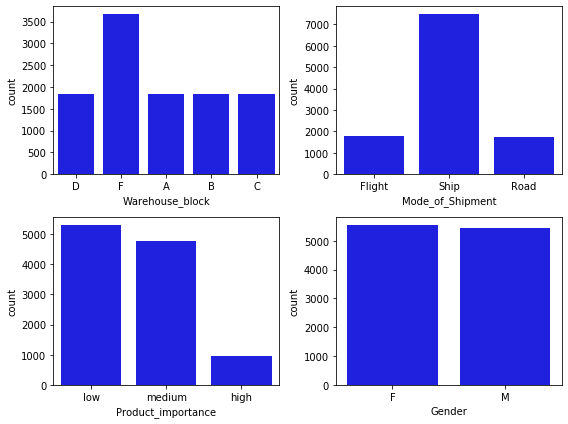

In [16]:
plt.figure(figsize=(8,6))
for i in range(0,len(cat)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[cat[i]],color='blue')
    plt.tight_layout()

In [17]:
df_delay = pd.DataFrame(df.Late.value_counts().reset_index().values, columns=["Late", "Count"])
df_delay = df_delay.sort_index(axis = 0, ascending=True)
df_delay['Percentage'] = (df_delay['Count'] / len(df)) * 100
df_delay

,Late,Count,Percentage
0,1,6563,59.669061
1,0,4436,40.330939


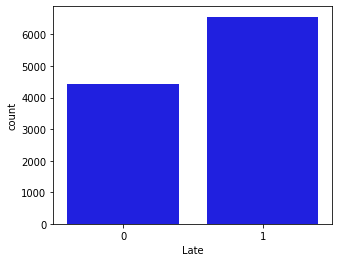

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(df['Late'],color='blue');

Memeriksa distribusi data target (Late) untuk mendeteksi keberadaan data imbalance, Kesimpulan terlihat pada barplot bahwa data tidak mengalami imbalance

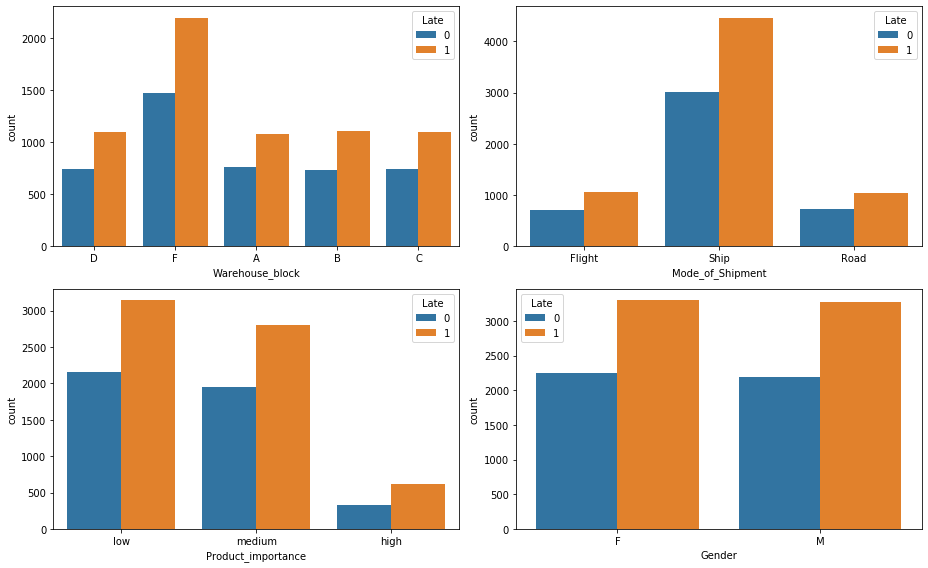

In [19]:
plt.figure(figsize=(13,8))
for i in range(0,len(cat)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]], hue="Late", data=df)
    plt.tight_layout();

### 2.2.2. EDA for Numerical Feature - Univariate Analysis

In [20]:
df[num].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


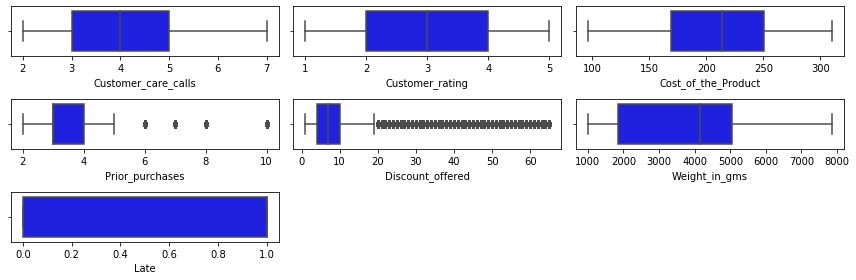

In [21]:
plt.figure(figsize=(12,4))
for i in range(0,len(num)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[num[i]],color='blue')
    plt.tight_layout()

Discount_offered dan Prior_purchases memiliki outliers yang cukup parah, keputusan untuk drop atau keep akan dipilih pada tahap Data Preprocessing

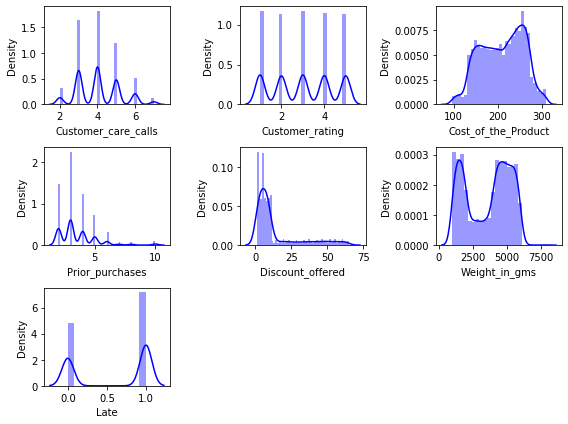

In [22]:
plt.figure(figsize=(8,6))
for i in range(0,len(num)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[num[i]],color='blue')
    plt.tight_layout()

<Figure size 1152x432 with 0 Axes>

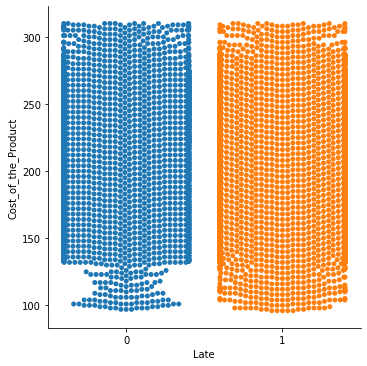

In [24]:
plt.figure(figsize=(16,6))
E2 = sns.catplot(x="Late", y="Cost_of_the_Product", kind="swarm",data=df)

Barang-barang yang dikirim tepat waktu jarang memiliki harga di sekitar 100, lebih banyak yang di atas nilai 100, sedangkan barang yang sampai dengan terlambat terdistribusi hampir sama banyaknya pada tingkat harga berapa pun.

<Figure size 1152x432 with 0 Axes>

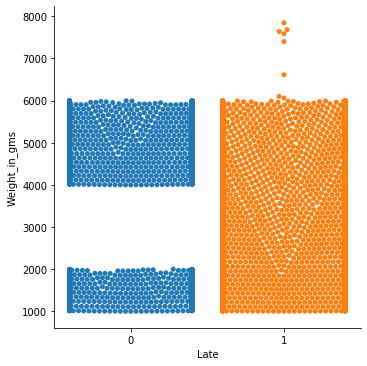

In [25]:
plt.figure(figsize=(16,6))
E3 = sns.catplot(x="Late", y="Weight_in_gms", kind="swarm",data=df)

<Figure size 1152x432 with 0 Axes>

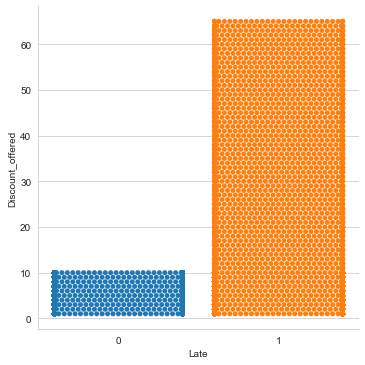

In [155]:
plt.figure(figsize=(16,6))
E3 = sns.catplot(x="Late", y="Discount_offered", kind="swarm",data=df)

Barang-barang yang diantarkan tepat waktu, tidak ada yang memiliki massa di kisaran 2-4 kg, sedangkan untuk barang yang sampai secara terlambat hampir distribusi merata pada massa berapa pun dan memiliki outlier pada massa yang terlalu tinggi.

<Figure size 576x288 with 0 Axes>

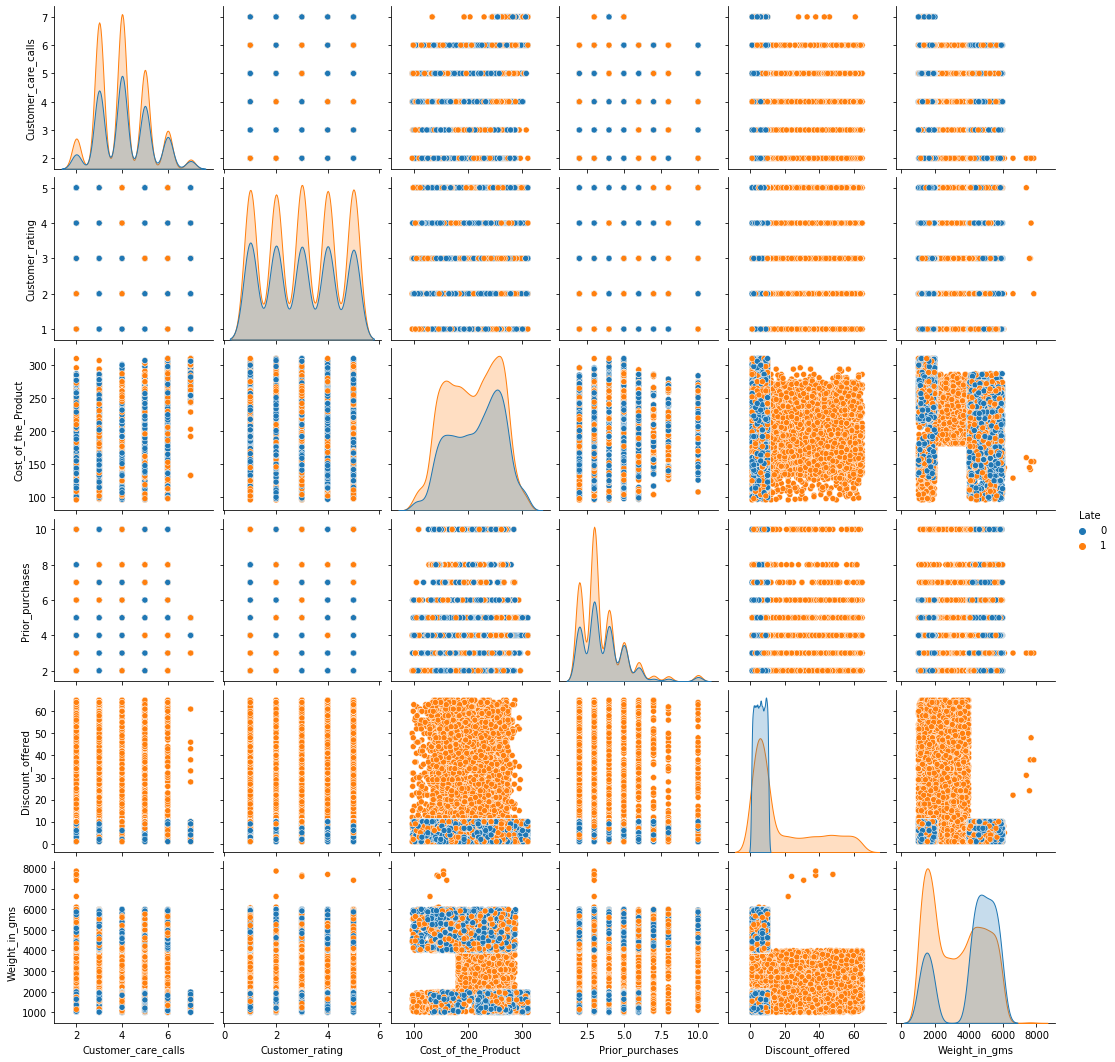

In [26]:
plt.figure(figsize = (8,4))

cols = ["Late",
       "Customer_care_calls",
       "Customer_rating",
       "Cost_of_the_Product",
       "Prior_purchases",
       "Discount_offered",
       "Weight_in_gms"]

sns.pairplot(data=df[cols], hue='Late')

In [23]:
corr = df.corr(method = "pearson")
corr

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Late
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Late,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


(8.0, 0.0)

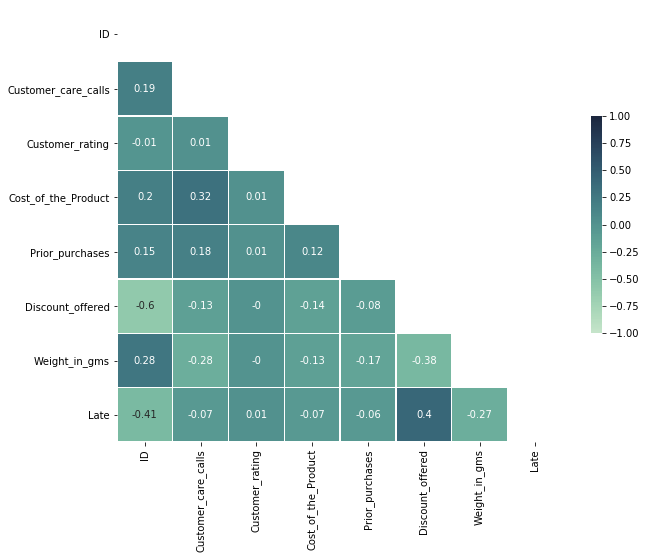

In [24]:
corr = df.corr(method = "pearson").round(2)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (10,8))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, 
           vmin = -1, vmax = 1, center = 0,
           linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
corelation = df.corr(method = "pearson")
corelation_sorted = corelation.sort_values( by = ["Late"], ascending = False)
corelation_sorted["Late"]

Late                   1.000000
Discount_offered       0.397108
Customer_rating        0.013119
Prior_purchases       -0.055515
Customer_care_calls   -0.067126
Cost_of_the_Product   -0.073587
Weight_in_gms         -0.268793
ID                    -0.411822
Name: Late, dtype: float64

Keputusan untuk melakukan drop pada feature yang berkorelasi rendah pada target akan dilakukan pada Data Preprocessing

# 3. Data Preprocessing

## 3.1. Data Null Checking

In [26]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Late                   0
dtype: int64

## 3.2. Data Duplicate Checking

In [27]:
df.duplicated().sum()

0

## 3.3. Outlier on Discount_offered

In [28]:
df['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

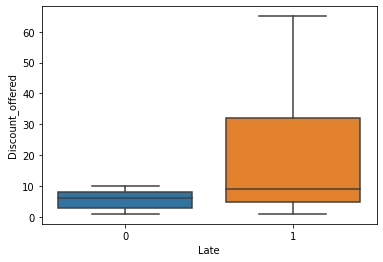

In [29]:
DO = sns.boxplot(x = "Late", y = "Discount_offered", data = df)

In [30]:
Q1 = df['Discount_offered'].quantile(0.25)
Q3 = df['Discount_offered'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df['Discount_offered']>=low_limit) & (df['Discount_offered']<=high_limit))
test_remove_outliers_df = df[filtered_entries]

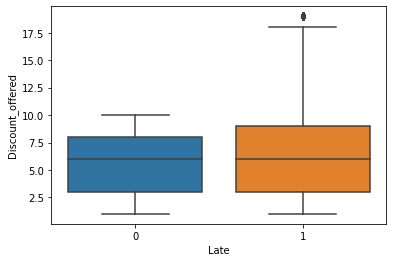

In [31]:
D1 = sns.boxplot(x = "Late", y = "Discount_offered", data = test_remove_outliers_df)

Outliers pada discount offered akan dibiarkan karena ketika outliers dihapus, pengiriman cenderung untuk terlambat

## 3.4. Outlier on Prior_purchases

In [32]:
df['Prior_purchases'].describe()

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64

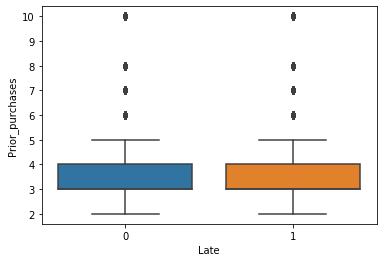

In [33]:
PP = sns.boxplot(x = "Late", y = "Prior_purchases", data = df)

In [34]:
Q1 = df['Prior_purchases'].quantile(0.25)
Q3 = df['Prior_purchases'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df['Prior_purchases']>=low_limit) & (df['Prior_purchases']<=high_limit))
test_remove_outliers_df = df[filtered_entries]

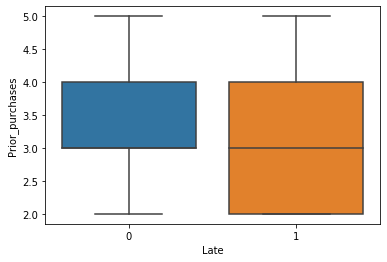

In [35]:
P1 = sns.boxplot(x = "Late", y = "Prior_purchases", data = test_remove_outliers_df)

# 4. Insight

## 4.1. Insight by Categorical Features

#### Late Delivery Based on Warehouse Block

In [36]:
df_block_ontime = df.groupby(['Warehouse_block','Late'])['Late'].count().reset_index(name='Count')
df_block_ontime['Percentage'] = (df_block_ontime['Count'] / len(df)) * 100
df_block_ontime

,Warehouse_block,Late,Count,Percentage
0,A,0,758,6.891536
1,A,1,1075,9.773616
2,B,0,729,6.627875
3,B,1,1104,10.037276
4,C,0,739,6.718793
5,C,1,1094,9.946359
6,D,0,738,6.709701
7,D,1,1096,9.964542
8,F,0,1472,13.383035
9,F,1,2194,19.947268


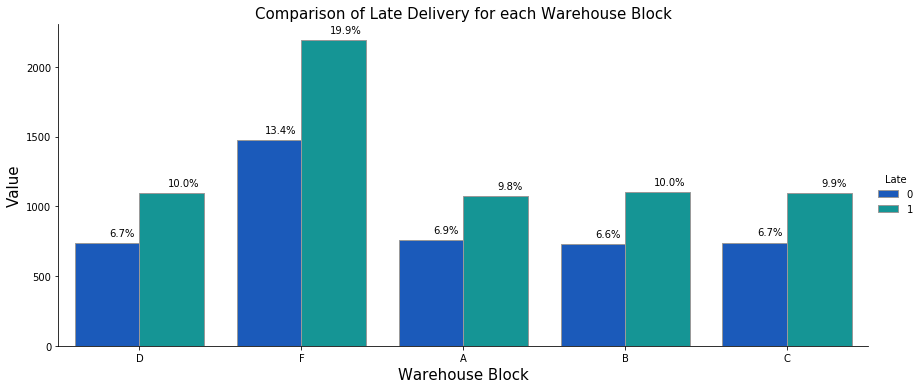

In [37]:
total = float(len(df))
B = sns.catplot(x ="Warehouse_block", hue="Late", kind="count", edgecolor=".6",height=5, aspect=12/5, palette="winter",data=df)
plt.title('Comparison of Late Delivery for each Warehouse Block', fontsize=15)
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel('Value', fontsize=15)


for p in B.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    B.ax.annotate(percentage, (x, y),ha='right',va='bottom', fontsize=10, color='black', xytext=(-5, 5),
                 textcoords='offset points')
    
plt.show()

In [38]:
block_group = df_block_ontime.groupby(['Warehouse_block', 'Late']).agg({'Count': 'sum'}).reset_index()
block_group.columns = ['Warehouse_block','Late','Count']
block_group['Total'] = block_group.groupby(['Warehouse_block'])['Count'].transform('sum')
block_group['%'] = (block_group['Count']/block_group['Total']*100)
block_group

,Warehouse_block,Late,Count,Total,%
0,A,0,758,1833,41.352973
1,A,1,1075,1833,58.647027
2,B,0,729,1833,39.770867
3,B,1,1104,1833,60.229133
4,C,0,739,1833,40.316421
5,C,1,1094,1833,59.683579
6,D,0,738,1834,40.239913
7,D,1,1096,1834,59.760087
8,F,0,1472,3666,40.152755
9,F,1,2194,3666,59.847245


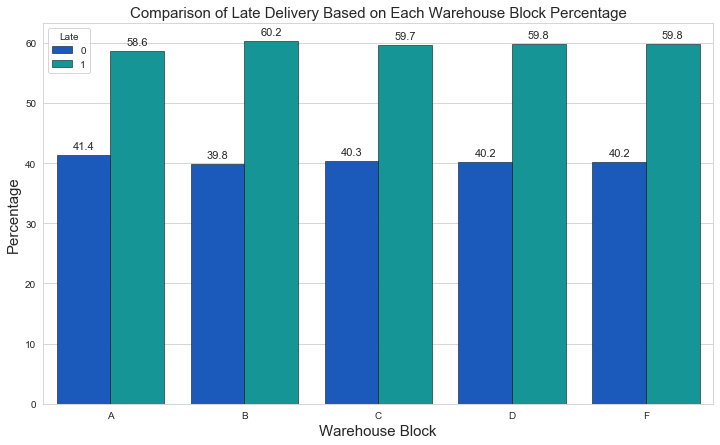

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
weight_cat=sns.barplot(x="Warehouse_block", y="%", hue='Late', data=block_group, palette="winter",edgecolor= 'black', linewidth =0.5)
plt.title('Comparison of Late Delivery Based on Each Warehouse Block Percentage', fontsize=15)
plt.xlabel('Warehouse Block', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in weight_cat.patches:
    weight_cat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)

#### Late Delivery Based on Mode of Shipment

In [40]:
df_shipment_ontime = df.groupby(['Mode_of_Shipment','Late'])['Late'].count().reset_index(name='Count')
df_shipment_ontime['Percentage'] = (df_shipment_ontime['Count'] / len(df)) * 100
df_shipment_ontime

,Mode_of_Shipment,Late,Count,Percentage
0,Flight,0,708,6.436949
1,Flight,1,1069,9.719065
2,Road,0,725,6.591508
3,Road,1,1035,9.409946
4,Ship,0,3003,27.302482
5,Ship,1,4459,40.540049


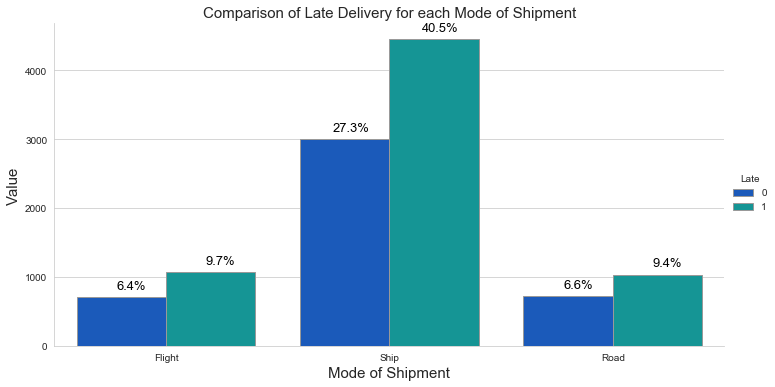

In [41]:
C = sns.catplot(x="Mode_of_Shipment", hue="Late", kind="count", edgecolor=".6",height=5, aspect=12/6, palette="winter",data=df)
plt.title('Comparison of Late Delivery for each Mode of Shipment', fontsize=15)
plt.xlabel('Mode of Shipment', fontsize=15)
plt.ylabel('Value', fontsize=15)

for p in C.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    C.ax.annotate(percentage, (x, y),ha='right',va='bottom', fontsize=13, color='black', xytext=(-20, 5),
                 textcoords='offset points')
    
plt.show()

In [42]:
shipment_group = df_shipment_ontime.groupby(['Mode_of_Shipment', 'Late']).agg({'Count': 'sum'}).reset_index()
shipment_group.columns = ['Mode_of_Shipment','Late','Count']
shipment_group['Total'] = shipment_group.groupby(['Mode_of_Shipment'])['Count'].transform('sum')
shipment_group['%'] = (shipment_group['Count']/shipment_group['Total']*100)
shipment_group

,Mode_of_Shipment,Late,Count,Total,%
0,Flight,0,708,1777,39.842431
1,Flight,1,1069,1777,60.157569
2,Road,0,725,1760,41.193182
3,Road,1,1035,1760,58.806818
4,Ship,0,3003,7462,40.243902
5,Ship,1,4459,7462,59.756098


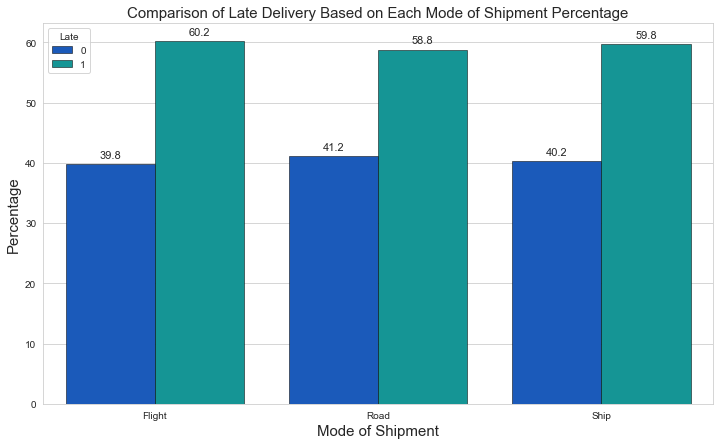

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
weight_cat=sns.barplot(x="Mode_of_Shipment", y="%", hue='Late', data=shipment_group, palette="winter",edgecolor= 'black', linewidth =0.5)
plt.title('Comparison of Late Delivery Based on Each Mode of Shipment Percentage', fontsize=15)
plt.xlabel('Mode of Shipment', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in weight_cat.patches:
    weight_cat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)

#### Late Delivery Based on Product Importance

In [44]:
df_importance_ontime = df.groupby(['Product_importance','Late'])['Late'].count().reset_index(name='Count')
df_importance_ontime['Percentage'] = (df_importance_ontime['Count'] / len(df)) * 100
df_importance_ontime

,Product_importance,Late,Count,Percentage
0,high,0,332,3.018456
1,high,1,616,5.600509
2,low,0,2157,19.610874
3,low,1,3140,28.548050
4,medium,0,1947,17.701609
5,medium,1,2807,25.520502


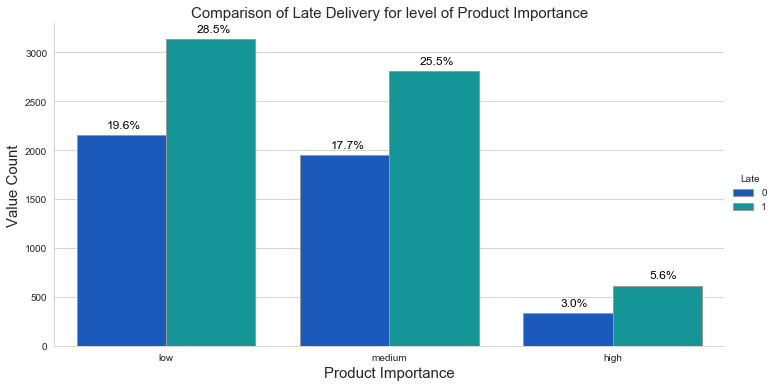

In [45]:
total = float(len(df))
D = sns.catplot(x="Product_importance", hue="Late", kind="count", edgecolor=".6", height=5, aspect=12/6, palette="winter",data=df)
plt.title('Comparison of Late Delivery for level of Product Importance', fontsize=15)
plt.xlabel('Product Importance', fontsize=15)
plt.ylabel('Value Count', fontsize=15)


for p in D.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    D.ax.annotate(percentage, (x, y),ha='right',va='bottom', fontsize=12, color='black', xytext=(-25, 5),
                 textcoords='offset points')
    
plt.show()

In [46]:
importance_group = df_importance_ontime.groupby(['Product_importance', 'Late']).agg({'Count': 'sum'}).reset_index()
importance_group.columns = ['Product_importance','Late','Count']
importance_group['Total'] = importance_group.groupby(['Product_importance'])['Count'].transform('sum')
importance_group['%'] = (importance_group['Count']/importance_group['Total']*100)
importance_group

,Product_importance,Late,Count,Total,%
0,high,0,332,948,35.021097
1,high,1,616,948,64.978903
2,low,0,2157,5297,40.721163
3,low,1,3140,5297,59.278837
4,medium,0,1947,4754,40.954985
5,medium,1,2807,4754,59.045015


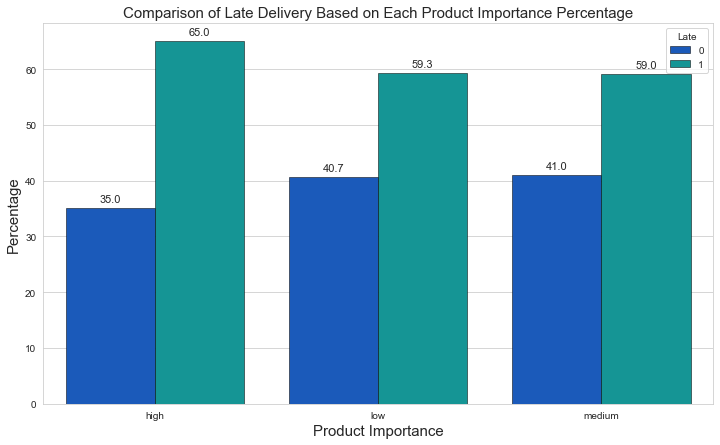

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
weight_cat=sns.barplot(x="Product_importance", y="%", hue='Late', data=importance_group, palette="winter",edgecolor= 'black', linewidth =0.5)
plt.title('Comparison of Late Delivery Based on Each Product Importance Percentage', fontsize=15)
plt.xlabel('Product Importance', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in weight_cat.patches:
    weight_cat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)

#### Late Delivery Based on Gender

In [48]:
df_gender = df.groupby(['Gender','Late'])['Late'].count().reset_index(name='Count')
df_gender['Percentage'] = (df_gender['Count'] / len(df)) * 100
df_gender

,Gender,Late,Count,Percentage
0,F,0,2249,20.447313
1,F,1,3296,29.966361
2,M,0,2187,19.883626
3,M,1,3267,29.702700


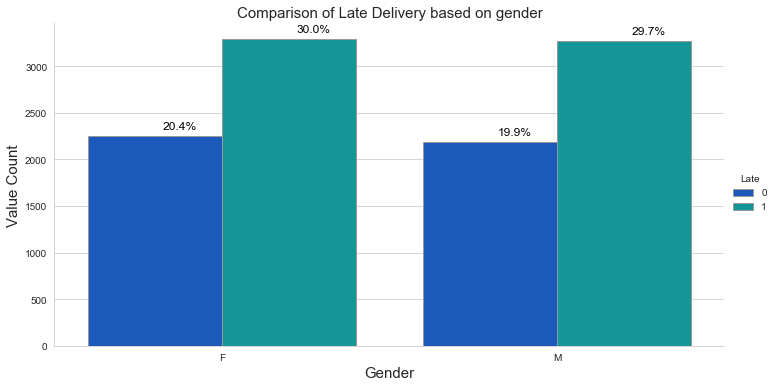

In [49]:
total = float(len(df))
D = sns.catplot(x="Gender", hue="Late", kind="count", edgecolor=".6", height=5, aspect=12/6, palette="winter",data=df)
plt.title('Comparison of Late Delivery based on gender', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Value Count', fontsize=15)


for p in D.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    D.ax.annotate(percentage, (x, y),ha='right',va='bottom', fontsize=12, color='black', xytext=(-25, 5),
                 textcoords='offset points')
    
plt.show()

In [50]:
gender_group = df_gender.groupby(['Gender', 'Late']).agg({'Count': 'sum'}).reset_index()
gender_group.columns = ['Gender','Late','Count']
gender_group['Total'] = gender_group.groupby(['Gender'])['Count'].transform('sum')
gender_group['%'] = (gender_group['Count']/gender_group['Total']*100)
gender_group

,Gender,Late,Count,Total,%
0,F,0,2249,5545,40.559062
1,F,1,3296,5545,59.440938
2,M,0,2187,5454,40.099010
3,M,1,3267,5454,59.900990


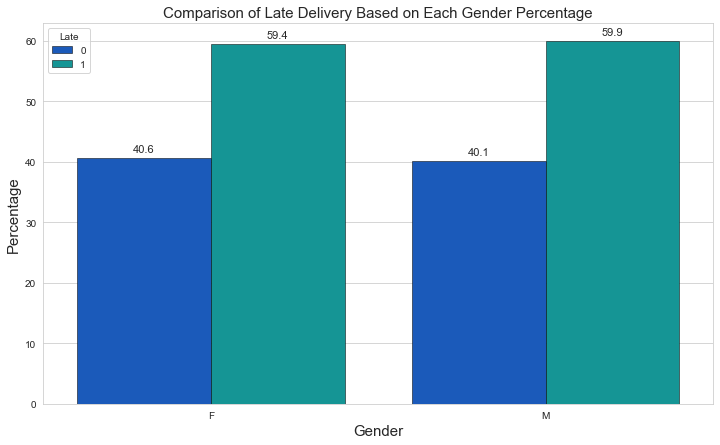

In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
weight_cat=sns.barplot(x="Gender", y="%", hue='Late', data=gender_group, palette="winter",edgecolor= 'black', linewidth =0.5)
plt.title('Comparison of Late Delivery Based on Each Gender Percentage', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in weight_cat.patches:
    weight_cat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)

## 4.2. Insight by Numerical Features

### Late Delivery Based on Customer Care Calls

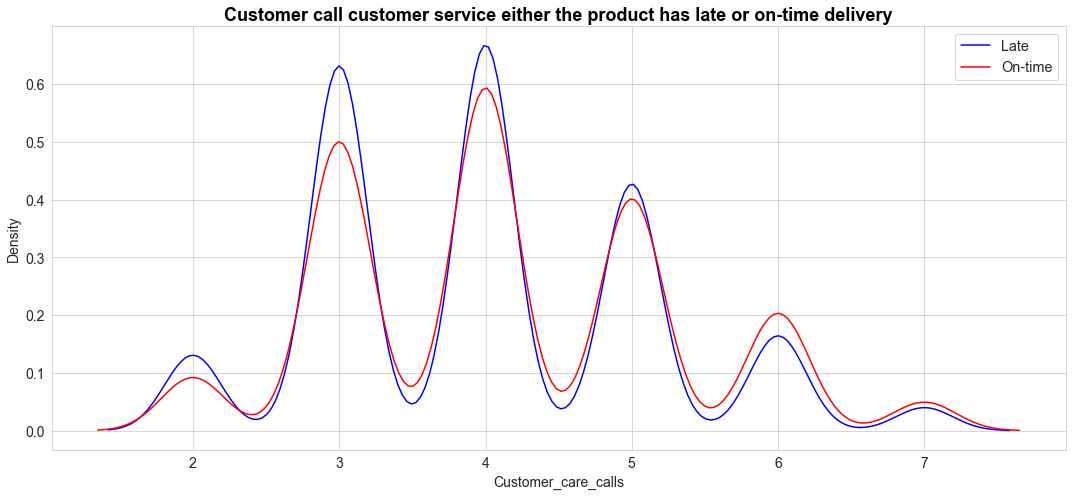

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df[df['Late'] == 1]['Customer_care_calls'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Customer_care_calls'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('Customer call customer service either the product has late or on-time delivery',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Customer_care_calls', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='10')

plt.tight_layout()

### Late Delivery Based on Customer Rating

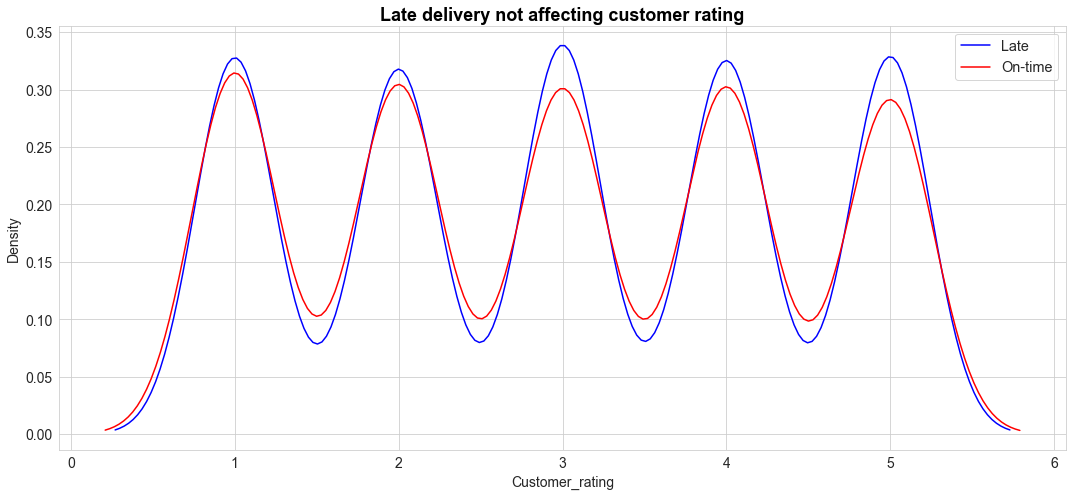

In [53]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df[df['Late'] == 1]['Customer_rating'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Customer_rating'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('Late delivery not affecting customer rating',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Customer_rating', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='10')

plt.tight_layout()

### Late Delivery Based on Cost of Product

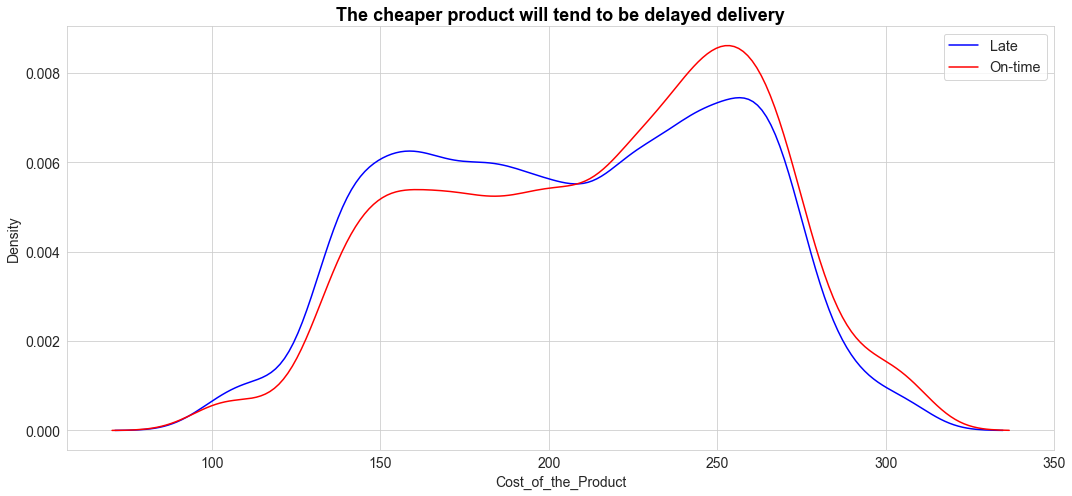

In [54]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df[df['Late'] == 1]['Cost_of_the_Product'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Cost_of_the_Product'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('The cheaper product will tend to be delayed delivery',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Cost_of_the_Product', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='10')

plt.tight_layout()

### Late Delivery Based on Prior Purchases

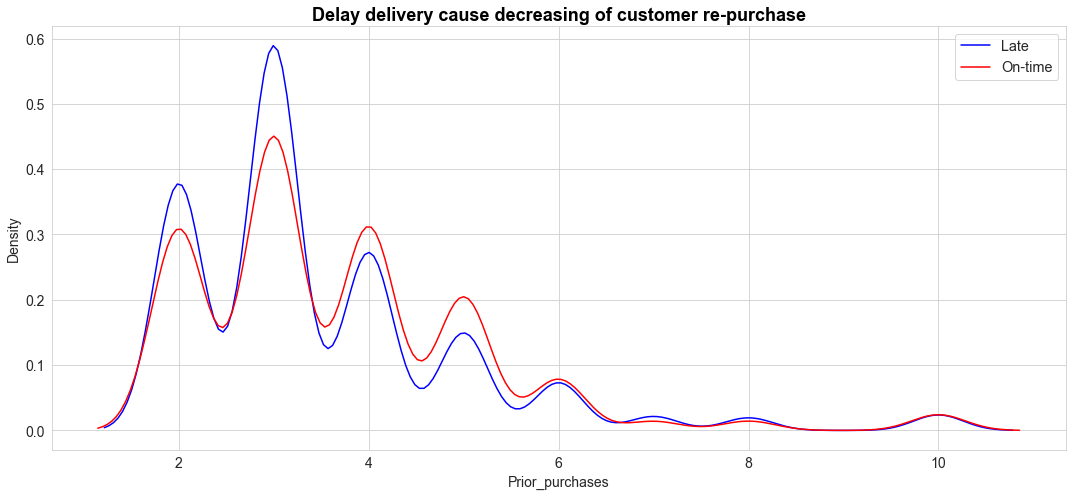

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.kdeplot(df[df['Late'] == 1]['Prior_purchases'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Prior_purchases'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('Delay delivery cause decreasing of customer re-purchase',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Prior_purchases', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='12')

plt.tight_layout()

### Late Delivery Based on Discount Offered

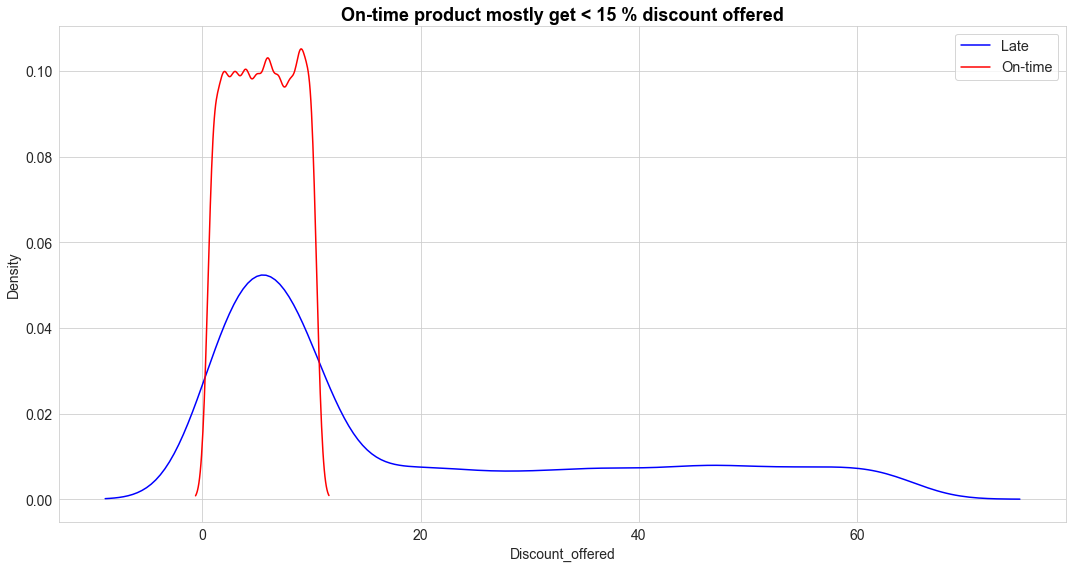

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(df[df['Late'] == 1]['Discount_offered'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Discount_offered'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('On-time product mostly get < 15 % discount offered',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Discount_offered', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='10')

plt.tight_layout()

### Late Delivery Based on Weight in Gms

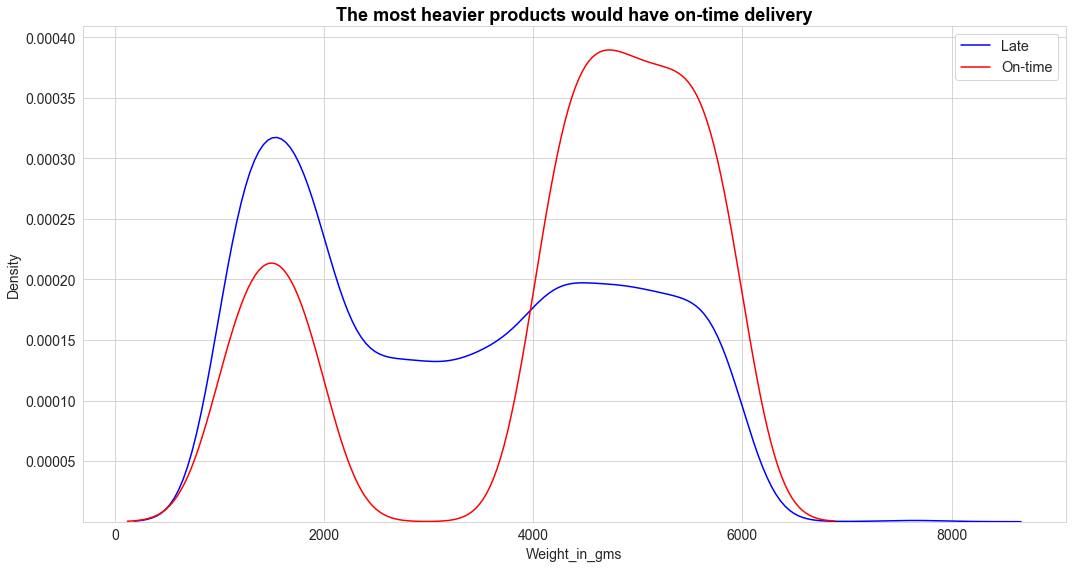

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(df[df['Late'] == 1]['Weight_in_gms'], color= 'blue', label= 'Late', ax=ax)
sns.kdeplot(df[df['Late'] == 0]['Weight_in_gms'], color= 'red', label= 'On-time', ax=ax)

ax.set_title('The most heavier products would have on-time delivery',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Weight_in_gms', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='10')

plt.tight_layout()

# 5. Feature Engineering

### 5.1. Drop Some Un-significant Features for Modeling

These columns are dropped: ID, Customer Rating, , and Gender

In [59]:
df2 = df.drop(['ID','Customer_rating','Gender'], axis=1)

In [60]:
df2.shape

(10999, 9)

In [61]:
df2.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late
0,D,Flight,4,177,3,low,44,1233,1
1,F,Flight,4,216,2,low,59,3088,1
2,A,Flight,2,183,4,low,48,3374,1
3,B,Flight,3,176,4,medium,10,1177,1
4,C,Flight,2,184,3,medium,46,2484,1


### 5.2. Create New Feature : Total_Cost

In [62]:
sum = df2["Cost_of_the_Product"] - df2["Discount_offered"]
df2["Total_cost"] = sum
df2.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost
0,D,Flight,4,177,3,low,44,1233,1,133
1,F,Flight,4,216,2,low,59,3088,1,157
2,A,Flight,2,183,4,low,48,3374,1,135
3,B,Flight,3,176,4,medium,10,1177,1,166
4,C,Flight,2,184,3,medium,46,2484,1,138


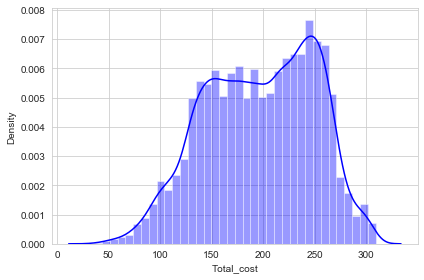

In [63]:
sns.distplot(df2['Total_cost'],color='blue')
plt.tight_layout()

<Figure size 1152x432 with 0 Axes>

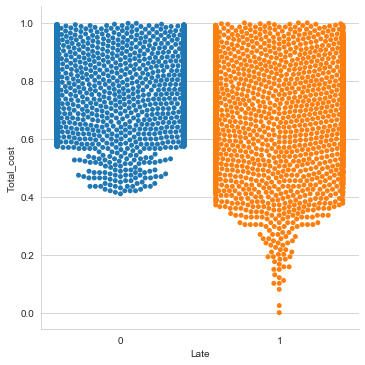

In [150]:
plt.figure(figsize=(16,6))
E3 = sns.catplot(x="Late", y="Total_cost", kind="swarm",data=df2)

In [64]:
df2.describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Late,Total_cost
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729,0.596691,196.823620
std,1.141490,48.063272,1.522860,16.205527,1635.377251,0.490584,52.802998
min,2.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,36.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,155.000000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,200.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,241.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,309.000000


### 5.3. Create New Feature : weight_cat

In [65]:
def weight_cat(x):
    if x['Weight_in_gms'] >= 1000 and x['Weight_in_gms'] < 3000:
        weight_cat = 'light'
    elif x['Weight_in_gms'] >= 3000 and x['Weight_in_gms'] < 5000:
        weight_cat = 'normal'
    else:
        weight_cat = 'heavy'
    return weight_cat

<Figure size 1152x432 with 0 Axes>

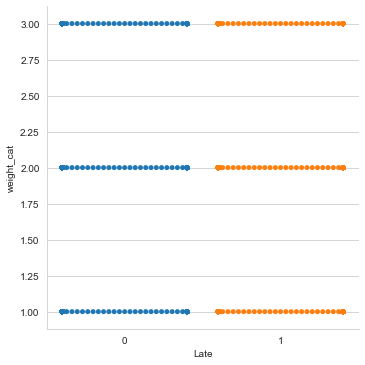

In [151]:
plt.figure(figsize=(16,6))
E3 = sns.catplot(x="Late", y="weight_cat", kind="swarm",data=df2)

In [66]:
df2['weight_cat'] = df2.apply(lambda x: weight_cat(x), axis=1)
df2.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost,weight_cat
0,D,Flight,4,177,3,low,44,1233,1,133,light
1,F,Flight,4,216,2,low,59,3088,1,157,normal
2,A,Flight,2,183,4,low,48,3374,1,135,normal
3,B,Flight,3,176,4,medium,10,1177,1,166,light
4,C,Flight,2,184,3,medium,46,2484,1,138,light


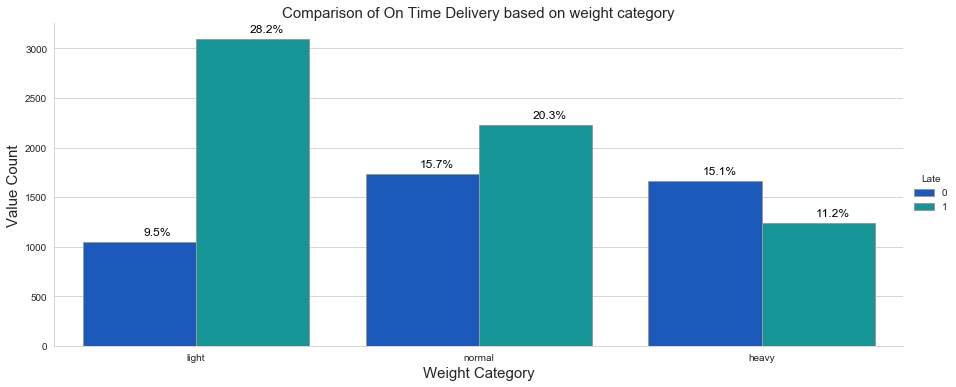

In [67]:
total = float(len(df2))
e = sns.catplot(x="weight_cat", hue="Late", kind="count", edgecolor=".6", height=5, aspect=10/4, palette="winter",data=df2)
plt.title('Comparison of On Time Delivery based on weight category', fontsize=15)
plt.xlabel('Weight Category', fontsize=15)
plt.ylabel('Value Count', fontsize=15)


for p in e.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    e.ax.annotate(percentage, (x, y),ha='right',va='bottom', fontsize=12, color='black', xytext=(-25, 5),
                 textcoords='offset points')
    
plt.show()

In [68]:
df_weight_cat = df2.groupby(['weight_cat','Late'])['Late'].count().reset_index(name='Count')
df_weight_cat['Percentage'] = (df_weight_cat['Count'] / len(df)) * 100
df_weight_cat

,weight_cat,Late,Count,Percentage
0,heavy,0,1659,15.083189
1,heavy,1,1235,11.228293
2,light,0,1046,9.509955
3,light,1,3098,28.166197
4,normal,0,1731,15.737794
5,normal,1,2230,20.274570


In [69]:
weight_cat_group = df_weight_cat.groupby(['weight_cat', 'Late']).agg({'Count': 'sum'}).reset_index()
weight_cat_group.columns = ['weight_cat','Late','Count']
weight_cat_group['Total'] = weight_cat_group.groupby(['weight_cat'])['Count'].transform('sum')
weight_cat_group['%'] = (weight_cat_group['Count']/weight_cat_group['Total']*100)
weight_cat_group

,weight_cat,Late,Count,Total,%
0,heavy,0,1659,2894,57.325501
1,heavy,1,1235,2894,42.674499
2,light,0,1046,4144,25.241313
3,light,1,3098,4144,74.758687
4,normal,0,1731,3961,43.701086
5,normal,1,2230,3961,56.298914


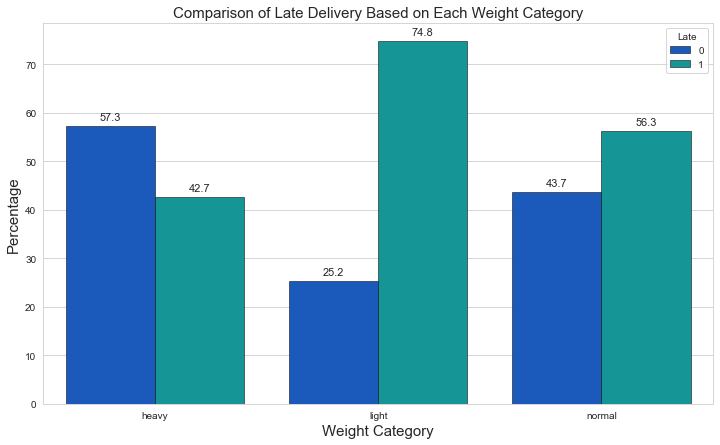

In [70]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
weight_cat=sns.barplot(x="weight_cat", y="%", hue='Late', data=weight_cat_group, palette="winter",edgecolor= 'black', linewidth =0.5)
plt.title('Comparison of Late Delivery Based on Each Weight Category', fontsize=15)
plt.xlabel('Weight Category', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

for p in weight_cat.patches:
    weight_cat.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                       textcoords = 'offset points', size=11)

In [71]:
df2.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost,weight_cat
0,D,Flight,4,177,3,low,44,1233,1,133,light
1,F,Flight,4,216,2,low,59,3088,1,157,normal
2,A,Flight,2,183,4,low,48,3374,1,135,normal
3,B,Flight,3,176,4,medium,10,1177,1,166,light
4,C,Flight,2,184,3,medium,46,2484,1,138,light


The data doesn't indicate whether Discount offered is dollar value or percentage discount, however a 60% discount in few cases are too extreme, therefore we test it using dollar value and check whether there are negative final values (if there are negative values, we'll use percentage discount). 

### 5.4. Pearson Correlation After Features Engineering

(7.0, 0.0)

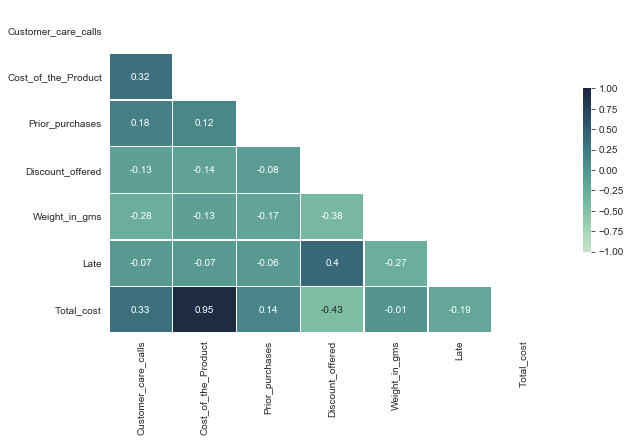

In [72]:
corr = df2.corr(method = "pearson").round(2)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (10,6))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, 
           vmin = -1, vmax = 1, center = 0,
           linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 6. Data Pre-Processing Before Modeling

### 6.1. One-hot encoding for all categorical data with more than 3 unique values

In [73]:
onehot = ['Mode_of_Shipment','Warehouse_block']
df2 = pd.get_dummies(df2, columns = onehot)
df2.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost,weight_cat,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,177,3,low,44,1233,1,133,light,1,0,0,0,0,0,1,0
1,4,216,2,low,59,3088,1,157,normal,1,0,0,0,0,0,0,1
2,2,183,4,low,48,3374,1,135,normal,1,0,0,1,0,0,0,0
3,3,176,4,medium,10,1177,1,166,light,1,0,0,0,1,0,0,0
4,2,184,3,medium,46,2484,1,138,light,1,0,0,0,0,1,0,0


### 6.2. Replace Product Importance values into numeric

In [74]:
df2['Product_importance'] = df2['Product_importance'].replace({'low':1,
                                                             'medium':2,
                                                             'high':3})

In [75]:
df2['Product_importance'].unique()

array([1, 2, 3], dtype=int64)

In [76]:
df2['weight_cat'] = df2['weight_cat'].replace({'light':1,
                                                'normal':2,
                                                'heavy':3})

In [77]:
df2['weight_cat'].unique()

array([1, 2, 3], dtype=int64)

In [78]:
df2.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost,weight_cat,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,177,3,1,44,1233,1,133,1,1,0,0,0,0,0,1,0
1,4,216,2,1,59,3088,1,157,2,1,0,0,0,0,0,0,1
2,2,183,4,1,48,3374,1,135,2,1,0,0,1,0,0,0,0
3,3,176,4,2,10,1177,1,166,1,1,0,0,0,1,0,0,0
4,2,184,3,2,46,2484,1,138,1,1,0,0,0,0,1,0,0


### 6.3. Normalization

In [79]:
features = ['Cost_of_the_Product','Weight_in_gms','Discount_offered','Prior_purchases','Customer_care_calls','Total_cost']

for var in features:
    df2[var]= (df2[var]+1).apply(np.log1p)

In [80]:
for var in features:
    df2[var]= MinMaxScaler().fit_transform(df2[var].values.reshape(len(df2), 1))

In [81]:
df2.shape

(10999, 17)

In [82]:
df2.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms', 'Late',
       'Total_cost', 'weight_cat', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Warehouse_block_A',
       'Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D',
       'Warehouse_block_F'],
      dtype='object')

### 6.4. Final Data After Feature Engineering

In [83]:
df2.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Late,Total_cost,weight_cat,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,0.50000,0.520207,0.203114,1,0.878931,0.101142,1,0.603028,1,1,0,0,0,0,0,1,0
1,0.50000,0.690417,0.000000,1,0.969795,0.546928,1,0.680865,2,1,0,0,0,0,0,0,1
2,0.00000,0.548678,0.369070,1,0.905775,0.589957,1,0.610023,2,1,0,0,1,0,0,0,0
3,0.27517,0.515369,0.369070,2,0.446316,0.078586,1,0.707056,1,1,0,0,0,1,0,0,0
4,0.00000,0.553333,0.203114,2,0.892633,0.441207,1,0.620327,1,1,0,0,0,0,1,0,0


# 7. Machine Learning Modeling & Evaluation

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [85]:
from imblearn import under_sampling, over_sampling

## Split Train Test Data

In [86]:
from sklearn.model_selection import train_test_split 
X = df2.drop(columns=['Late','Cost_of_the_Product','Discount_offered','Weight_in_gms']) # Test drop Cost of product dan Discount offered karena sudah ditambahkan jadi Total Cost
y = df2['Late']

X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

In [87]:
print(pd.Series(y_over).value_counts())

1    6563
0    6563
Name: Late, dtype: int64


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [89]:
print(pd.Series(y_train).value_counts())

1    5258
0    3541
Name: Late, dtype: int64


---

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [91]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [92]:
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.65
Recall (Test Set): 0.79
F1-Score (Test Set): 0.71
AUC: 0.58


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
print(cf_matrixa)

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred)) # generate the precision, recall, f-1 score, num

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[ 340  555]
 [ 278 1027]]

accuracy
0.6213636363636363

classification report
              precision    recall  f1-score   support

           0       0.55      0.38      0.45       895
           1       0.65      0.79      0.71      1305

    accuracy                           0.62      2200
   macro avg       0.60      0.58      0.58      2200
weighted avg       0.61      0.62      0.60      2200


AUC Score
0.5834307241165264


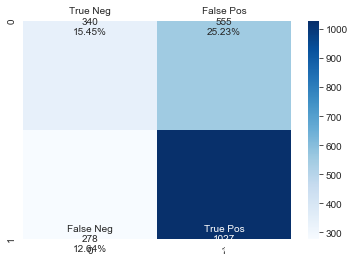

In [94]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

In [95]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.6257529264689169
Test score:0.6213636363636363


## Hyperparameter Tuning -  Logistic Regression

In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42)
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)


Accuracy (Test Set): 0.59
Precision (Test Set): 0.59
Recall (Test Set): 1.00
F1-Score (Test Set): 0.74
AUC: 0.50


In [97]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
cf_matrixa1 = confusion_matrix(y_test, y_pred)
print(cf_matrixa1)

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred)) # generate the precision, recall, f-1 score, num

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[   0  895]
 [   0 1305]]

accuracy
0.5931818181818181

classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       895
           1       0.59      1.00      0.74      1305

    accuracy                           0.59      2200
   macro avg       0.30      0.50      0.37      2200
weighted avg       0.35      0.59      0.44      2200


AUC Score
0.5


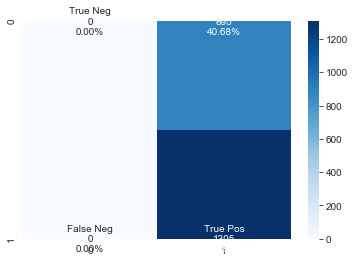

In [109]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa1.flatten()/np.sum(cf_matrixa1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa1, annot=labels, fmt='', cmap='Blues')

In [99]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:1.0


---

## Standard Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.67
Recall (Test Set): 0.65
F1-Score (Test Set): 0.65
AUC: 0.59


In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
cf_matrixb = confusion_matrix(y_test, y_pred)
print(cf_matrixb)

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[471 424]
 [463 842]]

accuracy
0.5968181818181818

classification report
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       895
           1       0.67      0.65      0.65      1305

    accuracy                           0.60      2200
   macro avg       0.58      0.59      0.59      2200
weighted avg       0.60      0.60      0.60      2200


AUC Score
0.5857338556047862


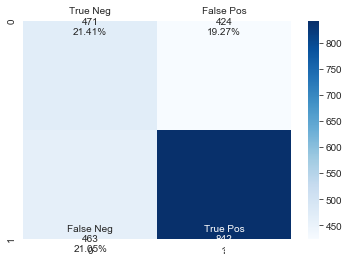

In [112]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixb.flatten()/np.sum(cf_matrixb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixb, annot=labels, fmt='', cmap='Blues')

In [113]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9818161154676668
Test score:0.5968181818181818


## Hyperparameter Tuning -  Decision Tree

In [117]:
from scipy.stats import uniform

max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] 
min_samples_split = [10, 100,200] 
min_samples_leaf = [1, 2, 4, 10, 20,50,100] 
max_features = ['auto', 'sqrt','log2'] 
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42,scoring='recall')
dt_tuned.fit(X_train, y_train)

y_pred = dt_tuned.predict(X_test)
eval_classification(dt_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.61
Precision (Test Set): 0.66
Recall (Test Set): 0.72
F1-Score (Test Set): 0.69
AUC: 0.59


In [115]:
print('Train score: ' + str(dt_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt_tuned.score(X_test, y_test))) #accuracy

Train score: 0.7491441612780525
Test score:0.7233716475095785


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
cf_matrixb1 = confusion_matrix(y_test, y_pred)
print(cf_matrixb)

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[471 424]
 [463 842]]

accuracy
0.610909090909091

classification report
              precision    recall  f1-score   support

           0       0.53      0.45      0.48       895
           1       0.66      0.72      0.69      1305

    accuracy                           0.61      2200
   macro avg       0.59      0.59      0.59      2200
weighted avg       0.60      0.61      0.60      2200


AUC Score
0.5851495109056273


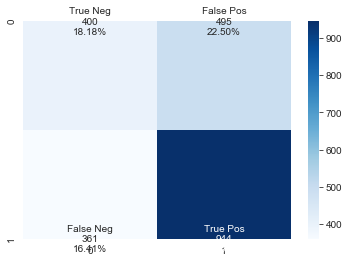

In [119]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixb1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixb1.flatten()/np.sum(cf_matrixb1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixb1, annot=labels, fmt='', cmap='Blues')

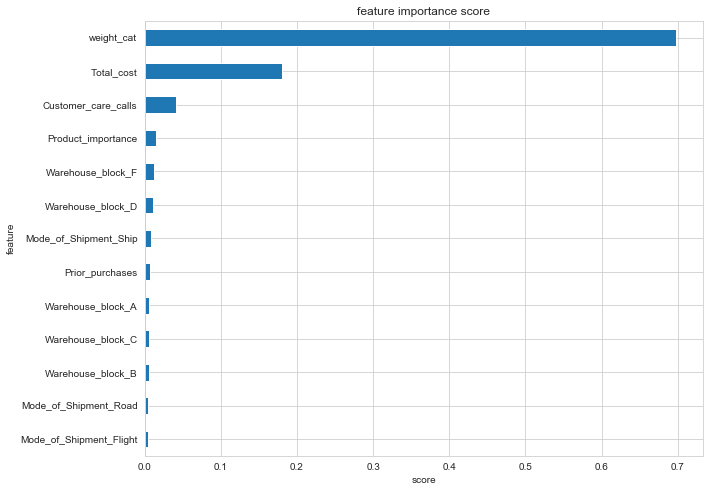

In [120]:
show_feature_importance(dt_tuned.best_estimator_)

---

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.61
Precision (Test Set): 0.67
Recall (Test Set): 0.67
F1-Score (Test Set): 0.67
AUC: 0.59


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[457 438]
 [428 877]]

accuracy
0.6063636363636363

classification report
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       895
           1       0.67      0.67      0.67      1305

    accuracy                           0.61      2200
   macro avg       0.59      0.59      0.59      2200
weighted avg       0.61      0.61      0.61      2200


AUC Score
0.5913225882403303


In [123]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9818161154676668
Test score:0.5968181818181818


## Hyperparameter Tuning - Random Forest

In [124]:
hyperparameters = dict(
                        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 20)], 
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 500, num = 11)],  
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1] 
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.69
Recall (Test Set): 0.73
F1-Score (Test Set): 0.71
AUC: 0.62


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[458 437]
 [353 952]]

accuracy
0.6409090909090909

classification report
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       895
           1       0.69      0.73      0.71      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200


AUC Score
0.6206168796421156


In [126]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf_tuned.score(X_test, y_test))) #accuracy

Train score: 0.803157093952073
Test score:0.7295019157088123


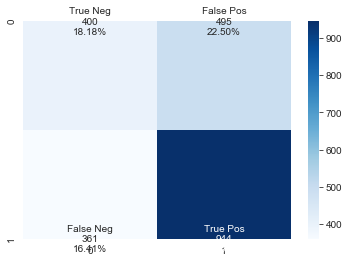

In [127]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixb1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixb1.flatten()/np.sum(cf_matrixb1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixb1, annot=labels, fmt='', cmap='Blues')

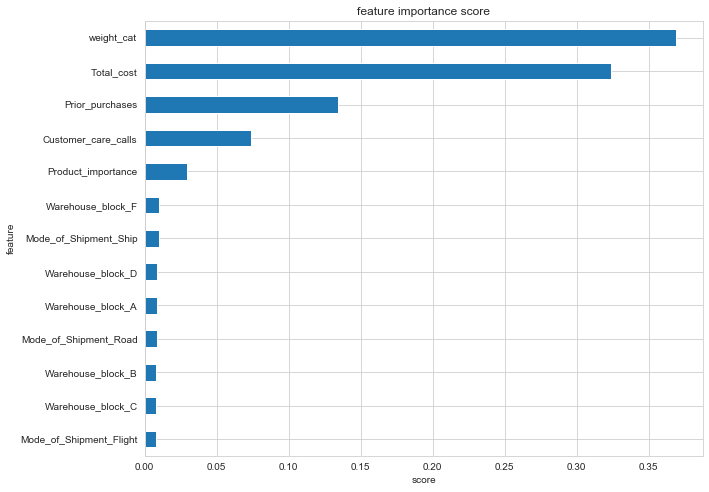

In [128]:
show_feature_importance(rf_tuned.best_estimator_)

---

## AdaBoost

In [129]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.63
Recall (Test Set): 0.76
F1-Score (Test Set): 0.69
AUC: 0.56


In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[326 569]
 [317 988]]

accuracy
0.5972727272727273

classification report
              precision    recall  f1-score   support

           0       0.51      0.36      0.42       895
           1       0.63      0.76      0.69      1305

    accuracy                           0.60      2200
   macro avg       0.57      0.56      0.56      2200
weighted avg       0.58      0.60      0.58      2200


AUC Score
0.560666966330615


In [131]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9818161154676668
Test score:0.5968181818181818


## Hyperparameter Tuning -  Adaboost

In [132]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.61
Recall (Test Set): 0.92
F1-Score (Test Set): 0.73
AUC: 0.53


In [133]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[ 122  773]
 [ 108 1197]]

accuracy
0.5995454545454545

classification report
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       895
           1       0.61      0.92      0.73      1305

    accuracy                           0.60      2200
   macro avg       0.57      0.53      0.47      2200
weighted avg       0.58      0.60      0.52      2200


AUC Score
0.5267771142361779


In [134]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9818161154676668
Test score:0.5968181818181818


In [135]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best learning_rate: 0.01663157894736842
Best algorithm: SAMME


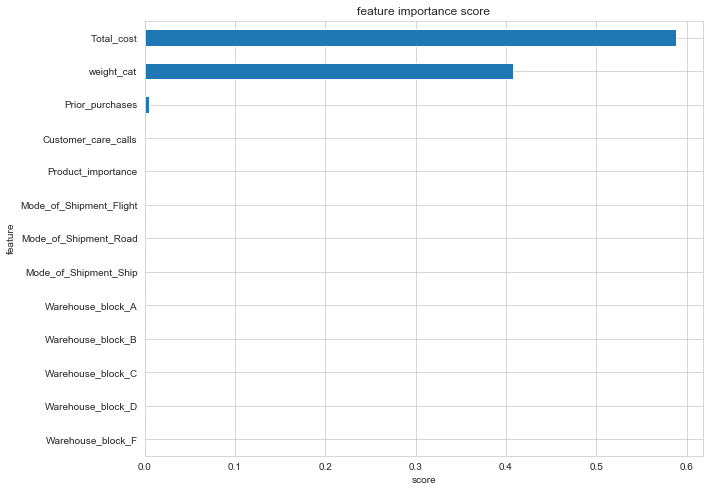

In [136]:
show_feature_importance(ab_tuned.best_estimator_)

---

## XGBoost

In [147]:
!pip install xgboost
from xgboost import XGBClassifier

#install library xgboost

In [148]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[00:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.62
Precision (Test Set): 0.68
Recall (Test Set): 0.68
F1-Score (Test Set): 0.68
AUC: 0.61


In [149]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[478 417]
 [420 885]]

accuracy
0.6195454545454545

classification report
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       895
           1       0.68      0.68      0.68      1305

    accuracy                           0.62      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.62      0.62      0.62      2200


AUC Score
0.6061195659153663


In [150]:
print('Train score: ' + str(rf_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf_tuned.score(X_test, y_test))) #accuracy

Train score: 0.803157093952073
Test score:0.7295019157088123


## Hyperparameter Tuning - XGBoost

In [151]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[00:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [142]:
print('Train score: ' + str(xg_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, y_test))) #accuracy

Train score: 0.7691137314568277
Test score:0.7409961685823755


In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[369 526]
 [338 967]]

accuracy
0.6072727272727273

classification report
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       895
           1       0.65      0.74      0.69      1305

    accuracy                           0.61      2200
   macro avg       0.58      0.58      0.58      2200
weighted avg       0.60      0.61      0.60      2200


AUC Score
0.5766433356878358


In [144]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 40
Best min_child_weight: 14
Best gamma: 0.8
Best tree_method: exact
Best colsample_bytree: 0.0
Best eta: 0.6565656565656566
Best lambda: 0.5
Best alpha: 0.30000000000000004


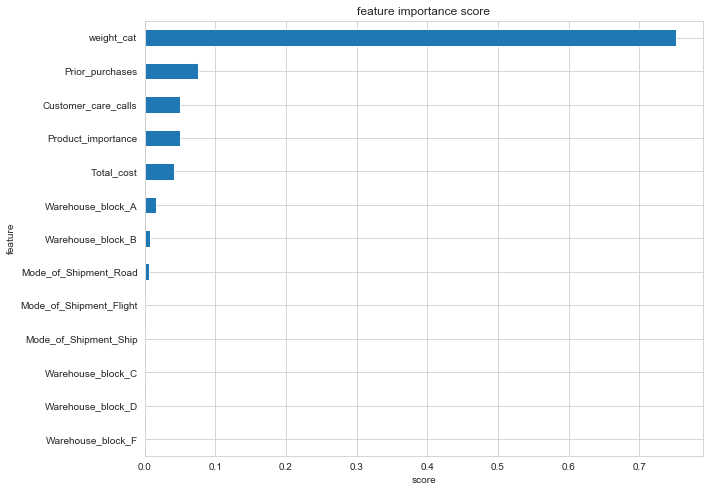

In [145]:
show_feature_importance(xg_tuned.best_estimator_)

In [146]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix')
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nAUC Score')
print(roc_auc_score(y_test, y_pred))


confusion matrix
[[369 526]
 [338 967]]

accuracy
0.6072727272727273

classification report
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       895
           1       0.65      0.74      0.69      1305

    accuracy                           0.61      2200
   macro avg       0.58      0.58      0.58      2200
weighted avg       0.60      0.61      0.60      2200


AUC Score
0.5766433356878358
